In [1]:
# Importovanie používaných knižníc

from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical
from keras_visualizer import visualizer 
from IPython.display import Image
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# importovanie datasetu do premenej "Hawks_cleared"

Hawks_cleared = pd.read_csv("Hawks_cleared.csv")

In [3]:
# informácie o datasete

print("Počet riadkov: ", Hawks_cleared.shape[0])
print("Počet stĺpcov: ", Hawks_cleared.shape[1])
print("Názvy stĺpcov: ", Hawks_cleared.columns)

Počet riadkov:  300
Počet stĺpcov:  4
Názvy stĺpcov:  Index(['Wing length', 'Tail length', 'Weight', 'Species'], dtype='object')


In [4]:
# vypísanie prvých 10 riadkov datasetu pre ukážku

print("Prvých 10 riadkov datasetu:")
Hawks_cleared.head(10)

Prvých 10 riadkov datasetu:


,Wing length,Tail length,Weight,Species
0,233,191,324,0
1,252,230,340,0
2,240,192,340,0
3,271,232,475,0
4,233,186,340,0
5,260,220,420,0
6,265,224,365,0
7,239,182,223,0
8,236,185,390,0
9,223,210,550,0


In [5]:
# vypísanie posledných 10 riadkov datasetu pre ukážku

print("Posledných 10 riadkov datasetu:")
Hawks_cleared.tail(10)

Posledných 10 riadkov datasetu:


,Wing length,Tail length,Weight,Species
290,192,160,175,2
291,195,158,195,2
292,156,122,100,2
293,163,137,105,2
294,194,147,202,2
295,160,135,95,2
296,143,159,170,2
297,162,136,100,2
298,161,129,95,2
299,161,121,95,2


<function matplotlib.pyplot.show(close=None, block=None)>

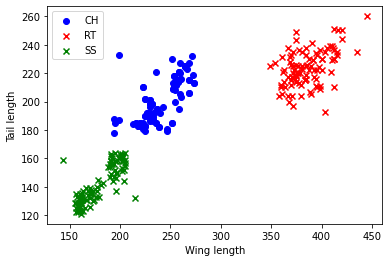

In [6]:
# na vizualizáciu používam knižnicu "matplotlib.pyplot", ktorú som si importoval na začiatku
# z knižnice použijem metódu "scatter", čo je bodový graf

# alokácia prvých 300 riadkov dataframu, uchovávam hodnoty prvých dvoch stĺpcov(wing a tail length)
x = Hawks_cleared.iloc[0:300,[0,1]].values  

plt.scatter(x[:100,0],x[:100,1],color='blue', label='CH')
plt.scatter(x[100:200,0],x[100:200,1],color='red', marker='x',label='RT')
plt.scatter(x[200:300,0],x[200:300,1],color='green', marker='x',label='SS')
plt.xlabel('Wing length')   #názov x-osi
plt.ylabel('Tail length')   #názov y-osi
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

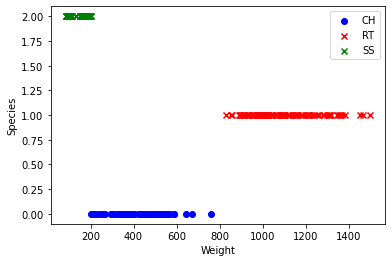

In [7]:
# alokácia prvých 300 riadkov dataframu, uchovávam hodnoty ďalších dvoch stĺpcov(váha a druh jastraba)

x = Hawks_cleared.iloc[0:300,[2,3]].values

plt.scatter(x[:100,0],x[:100,1],color='blue', label='CH')
plt.scatter(x[100:200,0],x[100:200,1],color='red', marker='x',label='RT')
plt.scatter(x[200:300,0],x[200:300,1],color='green', marker='x',label='SS')
plt.xlabel('Weight')   #názov x-osi
plt.ylabel('Species')   #názov y-osi
plt.legend()
plt.show

In [8]:
# definovanie paramtrov pre neurónovú sieť
# do premenej train_x(vstup) ukladám hodnoty z prvých troch stĺpcov(wing a tail length a weight)
# do premenej train_y(očakávaný výstup) hodnoty zo stĺpca "species"

X = Hawks_cleared.iloc[:,0:3].values
y = Hawks_cleared.iloc[:, 3].values

# prevedenie výstupu na kategorickú premennú
categorical = np_utils.to_categorical(y)

In [9]:
# rozdelenie dát na train,test pre X y. test_size urcite podiel training(90%) a test (10%)

X_train,X_test,y_train,y_test = train_test_split(X,categorical,test_size = 0.1) 



In [10]:
# prvý model neurónovej siete
# vstupné paramtre input_dim=3
# 3 skrýté vrstvy s 50 neurónmi
# na výtupe 3 neuróny 
# ako aktiváčnú funkciu pre všetky vrstvy som zvolil "sigmoid"
# dense (plne prepojené) vrstvy , spája všetky input hodnoty s output hudnotamy na každej vrstve

model = Sequential()
model.add(Dense(50, input_dim=3, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(3, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 5,453
Trainable params: 5,453
Non-trainable params: 0
_________________________________________________________________


In [11]:
# nastavenie kompilácie modelu
# loss funkcia je 'mean_squared_error' a optimalizačný algoritmus je 'sgd'
# metrics určuje na základe čoho sa bude presnosť siete merať
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [12]:
# sieť nechám natrénovať 10x
# následne je vykonaný evaluate siete(otestovanie)

print('Train:')
model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs=10,shuffle=True)
print('-------------------------------------------------------------------------------------')
print('Evaluate:')
scores = model.evaluate(X_test, y_test)
print('-------------------------------------------------------------------------------------')
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(scores[1]*100))

Train:
Epoch 1/10
9/9 [==============================] - 1s 93ms/step - loss: 0.2446 - accuracy: 0.3619 - val_loss: 0.2601 - val_accuracy: 0.2000
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.3303 - val_loss: 0.2569 - val_accuracy: 0.2000
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.3880 - val_loss: 0.2541 - val_accuracy: 0.2000
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.3657 - val_loss: 0.2512 - val_accuracy: 0.2000
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.3667 - val_loss: 0.2488 - val_accuracy: 0.2000
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2412 - accuracy: 0.3232 - val_loss: 0.2464 - val_accuracy: 0.2000
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.3338 - val_loss: 0.2444 - val_accuracy: 0.2000
Epoch 8/10
9/9 [==========

In [13]:
# kedže som dosiahol naozaj malú presnosť siete,
# zvýšením počtu epochs(nastavením parametru epochs), 
# dostanem lepší výsledok úspešnosti môjho modelu

print('Train:')
model.fit(X_train, y_train,epochs=200,validation_data = (X_test,y_test),shuffle=True)
print('-------------------------------------------------------------------------------------')
print('Evaluate:')
scores = model.evaluate(X_test, y_test)
print('-------------------------------------------------------------------------------------')
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(scores[1]*100))

Train:
Epoch 1/200
9/9 [==============================] - 0s 17ms/step - loss: 0.2298 - accuracy: 0.3481 - val_loss: 0.2379 - val_accuracy: 0.2000
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.3481 - val_loss: 0.2366 - val_accuracy: 0.2000
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.3481 - val_loss: 0.2358 - val_accuracy: 0.2000
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.3481 - val_loss: 0.2347 - val_accuracy: 0.2000
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.3481 - val_loss: 0.2336 - val_accuracy: 0.2000
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.3481 - val_loss: 0.2328 - val_accuracy: 0.2000
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.3481 - val_loss: 0.2319 - val_accuracy: 0.2000
Epoch 8/200
9/9 [==

In [14]:
y_pred = model.predict(X_test)

#vykonám predikcie na zaklade testovacich dát

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i])) #argmax vráti pozíciu najväčšej hodnoty
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

a = accuracy_score(pred,test) # porovnáva hodnoty a vyhodnotí na kolko % sa výsledky zhodujú 
print("Presnosť model1(%):", a*100)

# po zvýšení počtu epochs som dosiahol presnosť 56,7%

Presnosť model1(%): 56.666666666666664


In [15]:
# druhý model neurónovej siete
# vstupné paramtre input_dim=3
# 3 skrýté vrstvy s 100 neurónmi
# na výtupe 3 neuróny 
# ako aktiváčnú funkciu pre všetky vrstvy som zvolil opäť "sigmoid"

model2 = Sequential()
model2.add(Dense(100, input_dim=3, activation='sigmoid')) # vstupná vrstva
model2.add(Dense(100, activation='sigmoid'))              # skrytá vrstva
model2.add(Dense(100, activation='sigmoid'))              # skrytá vrstva
model2.add(Dense(3, activation = 'sigmoid'))              # vystupne neurony
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 303       
Total params: 20,903
Trainable params: 20,903
Non-trainable params: 0
_________________________________________________________________


In [16]:
# opäť vykonávam trenovanie s epochs=200 a následne otestujem

print('Train:')
model2.fit(X_train, y_train,epochs=200,validation_data=(X_test,y_test),shuffle=True)
print('-------------------------------------------------------------------------------------')
print('Evaluate:')
scores2 = model2.evaluate(X_test, y_test)
print('-------------------------------------------------------------------------------------')
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(scores2[1]*100))

Train:
Epoch 1/200
9/9 [==============================] - 0s 16ms/step - loss: 0.2760 - accuracy: 0.3617 - val_loss: 0.2732 - val_accuracy: 0.2000
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2660 - accuracy: 0.3420 - val_loss: 0.2632 - val_accuracy: 0.2000
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.3580 - val_loss: 0.2549 - val_accuracy: 0.2000
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.3464 - val_loss: 0.2480 - val_accuracy: 0.2000
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.3235 - val_loss: 0.2427 - val_accuracy: 0.2000
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.3377 - val_loss: 0.2385 - val_accuracy: 0.2000
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2314 - accuracy: 0.3643 - val_loss: 0.2348 - val_accuracy: 0.2000
Epoch 8/200
9/9 [==

In [17]:
y_pred = model2.predict(X_test)

#vykonám predikcie na zaklade testovacich dát

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i])) #argmax vráti pozíciu najväčšej hodnoty
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

a = accuracy_score(pred,test) # porovnáva hodnoty a vyhodnotí na kolko % sa výsledky zhodujú 
print("Presnosť model2(%):", a*100)

# pozorujem že pre rovnaké vstupné parametre sa mi po zvýšení počtu neurónov vo vrstvách
# podarilo dostať znova lepšiu úspešnosť siete

Presnosť model2(%): 100.0


In [18]:
# pe ďalšie zlepšenie presnosťi siete s musíme
# zamerať na vhodnejšie aktivačné funkcie alebo optimizer a loss funkciu

# vykonám trenovanie s jednotlivými optimizermi a zistím, ktorý pre môj model vhodný 

def trenuj():  # funkcia pre trénovanie a evaluate, aby som pre každý optimizer nepísal ten istý kód
    history = model2.fit(X_train, y_train, epochs=10,validation_data = (X_test,y_test),shuffle=True)
    model2.evaluate(X_test, y_test)
    return history

model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
historysgd = trenuj()

model2.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
historyrmsprop = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
historyadam = trenuj()

model2.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])
historynadam = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['accuracy'])
historyadagrad = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['accuracy'])
historyadadelta = trenuj()

model2.compile(loss='mean_squared_error', optimizer='adamax', metrics=['accuracy'])
historyadamax = trenuj()

Epoch 1/10
9/9 [==============================] - 0s 17ms/step - loss: 0.2085 - accuracy: 0.9655 - val_loss: 0.2082 - val_accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.9552 - val_loss: 0.2083 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.9546 - val_loss: 0.2082 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.9416 - val_loss: 0.2082 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2081 - accuracy: 0.9631 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2080 - accuracy: 0.9709 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2081 - accuracy: 0.9479 - val_loss: 0.2080 - val_accuracy: 1.0000
Epoch 8/10
9/9 [=================

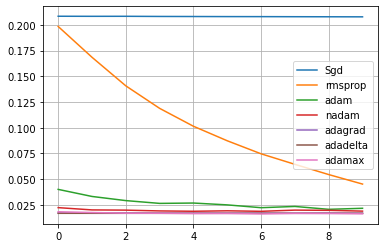

In [19]:
# zobrazenie výsledkov do grafu, hodnota "loss" v priebehu iterácií

plt.plot(historysgd.history['loss'], label="Sgd")
plt.plot(historyrmsprop.history['loss'], label="rmsprop")
plt.plot(historyadam.history['loss'], label="adam")
plt.plot(historynadam.history['loss'], label="nadam")
plt.plot(historyadagrad.history['loss'], label="adagrad")
plt.plot(historyadadelta.history['loss'], label="adadelta")
plt.plot(historyadamax.history['loss'], label="adamax")
plt.grid()
plt.legend()

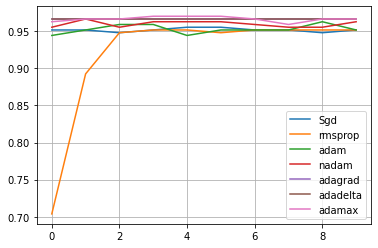

In [20]:
# zobrazenie výsledkov do grafu, hodnota "accuracy(presnosť)" v priebehu iterácií

plt.plot(historysgd.history['accuracy'], label="Sgd")
plt.plot(historyrmsprop.history['accuracy'], label="rmsprop")
plt.plot(historyadam.history['accuracy'], label="adam")
plt.plot(historynadam.history['accuracy'], label="nadam")
plt.plot(historyadagrad.history['accuracy'], label="adagrad")
plt.plot(historyadadelta.history['accuracy'], label="adadelta")
plt.plot(historyadamax.history['accuracy'], label="adamax")
plt.grid()
plt.legend()

In [21]:
# nastavenie finálneho modelu
# použijem aktivačnú funkciu relu (vhodná pre klasifikáciu)
# Relu: Jednotky v skrytej vrstve aplikujú aktivačnú funkciu na vyvolanie pocitu nelinearity v sieti. 
# Relu nám hovorí, ako blízke sú k 1 (1 = objavíme vzor, konkrétne kombináciu prvkov, ktorá vedie k tomuto výstupu).
# bez aktivačnej funkcie by NN bola len lineárna regresná funkcia.
# funkcia softmax sa používa ako aktivačná funkcia vo výstupnej vrstve modelov neurónových sietí, 
# ktoré predpovedajú multinomické rozdelenie pravdepodobnosti. 
# to znamená, že softmax sa používa ako aktivačná funkcia pre problémy s klasifikáciou viacerých tried
# použitých 6 skrytých vrstiev

model_final = Sequential()
model_final.add(Dense(100, input_dim=3, activation='relu'))
model_final.add(Dense(100, activation='relu'))
model_final.add(Dense(100, activation='relu'))
model_final.add(Dense(100, activation='relu'))
model_final.add(Dense(100, activation='relu'))
model_final.add(Dense(100, activation='relu'))
model_final.add(Dense(100, activation='relu'))
model_final.add(Dense(units=3, activation='softmax'))
model_final.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)              

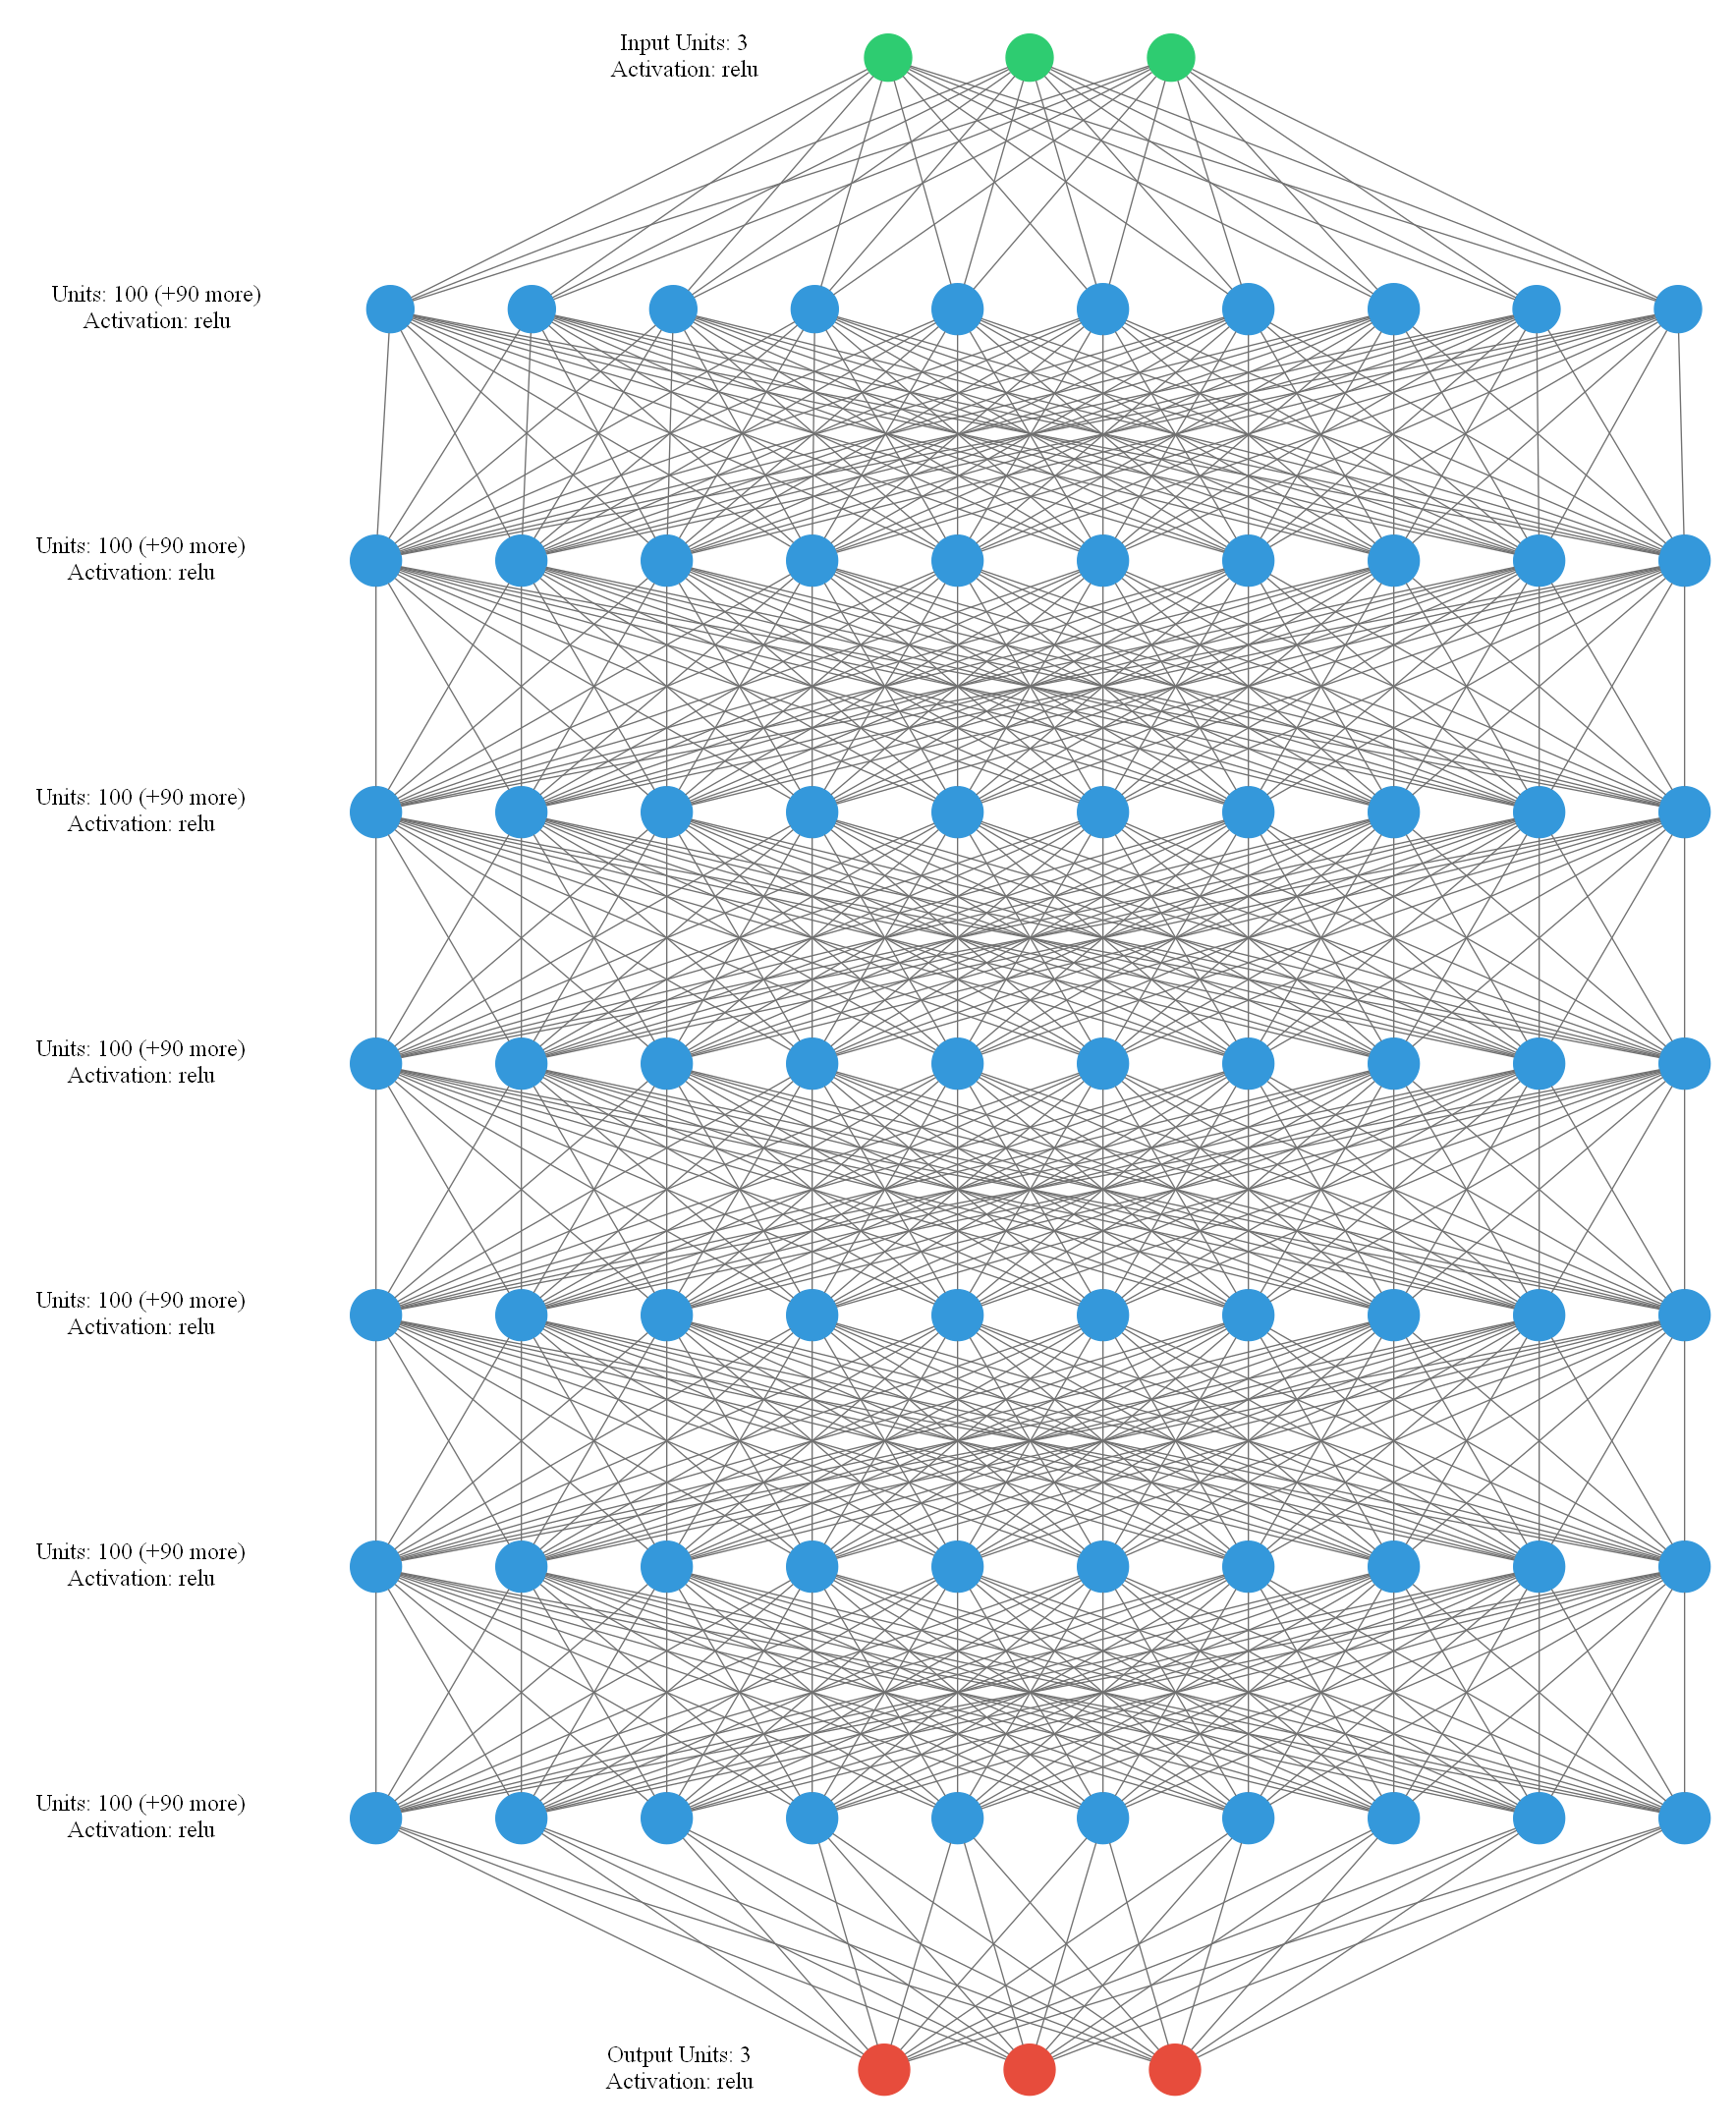

In [22]:
# vizualizácia finálneho modelu siete

visualizer(model_final, filename='model_viz',format = "png",view=False)
Image("model_viz.png")

In [23]:
# ako optimizér som na zákalde výsledkov testovania použil "adadelta"
# použitá loss funkcia categorical_crossentropy, ktorá je vhodná pri použití to_categorical na výstupných dátach

model_final.compile(optimizer="adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
print('Train:')
history = model_final.fit(X_train, y_train, epochs=200,validation_data = (X_test,y_test), shuffle=True)
print('-------------------------------------------------------------------------------------')
print('Evaluate:')
scores_f = model_final.evaluate(X_test, y_test)
print('-------------------------------------------------------------------------------------')
print("Výsledné skóre testovania neurónovej sieťe: {:.2f}% ".format(scores_f[1]*100))

Train:
Epoch 1/200
9/9 [==============================] - 1s 20ms/step - loss: 3.4247 - accuracy: 0.3453 - val_loss: 4.4435 - val_accuracy: 0.2000
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 3.3826 - accuracy: 0.3349 - val_loss: 4.2689 - val_accuracy: 0.2000
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 3.1134 - accuracy: 0.3592 - val_loss: 4.0950 - val_accuracy: 0.2000
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 3.0753 - accuracy: 0.3292 - val_loss: 3.9174 - val_accuracy: 0.2000
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 2.9874 - accuracy: 0.3619 - val_loss: 3.7352 - val_accuracy: 0.2000
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 2.8441 - accuracy: 0.3611 - val_loss: 3.5300 - val_accuracy: 0.2000
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 2.4260 - accuracy: 0.3877 - val_loss: 3.3182 - val_accuracy: 0.2000
Epoch 8/200
9/9 [==

In [24]:
y_pred = model_final.predict(X_test)

#vykonám predikcie na zaklade testovacich dát

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i])) #argmax vráti pozíciu najväčšej hodnoty
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test) # porovnáva hodnoty a vyhodnotí na kolko % sa výsledky zhodujú 
print("Presnosť finálny model(%):", a*100)

Presnosť finálny model(%): 100.0


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

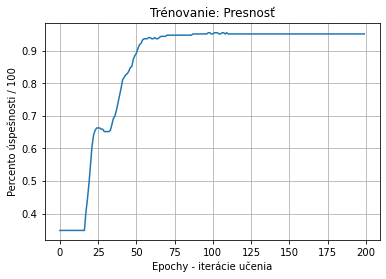

In [26]:
# zobrazenie presnosti siete v priebehu iterácií

plt.plot(history.history['accuracy'])
plt.title("Trénovanie: Presnosť")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

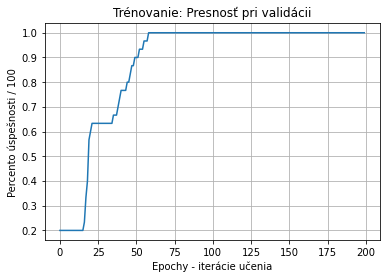

In [27]:
# zobrazenie presnosti pri validáci v priebehu iterácií 

plt.plot(history.history['val_accuracy'])
plt.title("Trénovanie: Presnosť pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Percento úspešnosti / 100")
plt.grid()

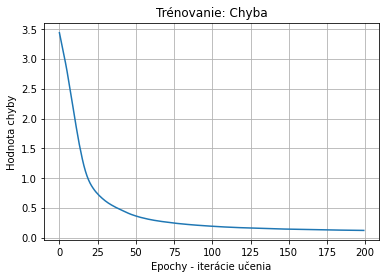

In [28]:
# zobrazenie chyby v priebehu iterácií 

plt.plot(history.history['loss'])
plt.title("Trénovanie: Chyba")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()

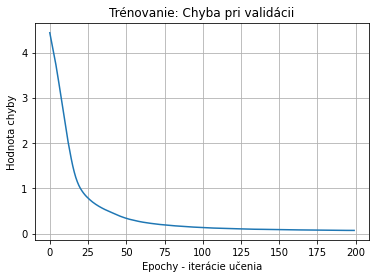

In [29]:
# zobrazenie chyby pri validáci v priebehu iterácií 

plt.plot(history.history['val_loss'])
plt.title("Trénovanie: Chyba pri validácii")
plt.xlabel("Epochy - iterácie učenia")
plt.ylabel("Hodnota chyby")
plt.grid()